# Correlation is not Causation_Regression Analysis in height Data 
### We use *regression* when we want to investigate the relationship between one variable (we call it *dependent*) and one or more other variables (we call them *independent*). Specifically, we want to investigate whether the dependent variable actually depends on the independent variables. In the simplest case we have only two variables, one dependent and one independent, and we handle them with *linear regression*.

* Linear regression starts with the *assumption* that the relationship between the dependent variable $y$ and the independent variable $x$ is of the form:

$$y = \alpha + \beta x + \epsilon$$

* In practice, we have a set of observations $y_i$ and $x_i$ and we want to estimate $\alpha$ and $\beta$.

### We will start with a historical example, which introduced the concept of regression.

### This is a study published by Francis Galton, in 1886, in which he examined the height of children in relation to the height of their parents.

* The main libraries we will use are SciPy and statsmodels.

* [SciPy](https://www.scipy.org/) offers various statistical functions.

* [statsmodels](https://www.statsmodels.org/stable/index.html) offers model implementations for statistical estimation.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

sns.set_theme()

In [2]:
galton_families = sm.datasets.get_rdataset("GaltonFamilies", package="HistData")

galton_families.data

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


* Let us take fathers and sons.

In [3]:
fathers_sons = galton_families.data[galton_families.data['gender'] == 'male']
fathers_sons

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
8,003,75.0,64.0,72.06,2,1,male,71.0
10,004,75.0,64.0,72.06,5,1,male,70.5
...,...,...,...,...,...,...,...,...
918,199,64.0,64.0,66.56,7,2,male,68.0
924,200,64.0,63.0,66.02,1,1,male,64.5
925,201,64.0,60.0,64.40,2,1,male,66.0
929,203,62.0,66.0,66.64,3,1,male,64.0


* We can start with the Pearson coefficient to see if there is any indication of a linear correlation between the height of the sons and the fathers.

In [4]:
pearsonr = stats.pearsonr(x=fathers_sons['father'], y=fathers_sons['childHeight'])
pearsonr

(0.39238349666283556, 3.7371088561934017e-19)

* The simplest way to work with regression in Python is using *formulas* like in the R statistics program.

* We define a model based on the appropriate mathematical formula.

* We then fit the model to our data by calling the `fit()` method.

* The `params' property of the results gives us the *ordinate* (intercept) and *slope* (slope) of the regression line.

In [5]:
fathers_sons_mod = smf.ols("childHeight ~ father", data=fathers_sons)
fathers_sons_res = fathers_sons_mod.fit()
fathers_sons_res.params

Intercept    38.362581
father        0.446523
dtype: float64

* This means that the relation between the variable `childHeight` ($y$) of the height of the sons and the height of the fathers `father` ($x$) is:

$$ y = 38{,}362581 + 0{,}446523 x $$

* If the father was $0$ inches tall (impossible of course), the son's height is $38{,}362581$ inches.

* For every inch the father's height increases, the son's height increases $0{.}446523$ of an inch.

* To see what the regression shows us, we will make a diagram.

* The plot will include the observations and the line resulting from the linear regression.

* We will also add the diagonal, in blue because it will help us understand the regression.

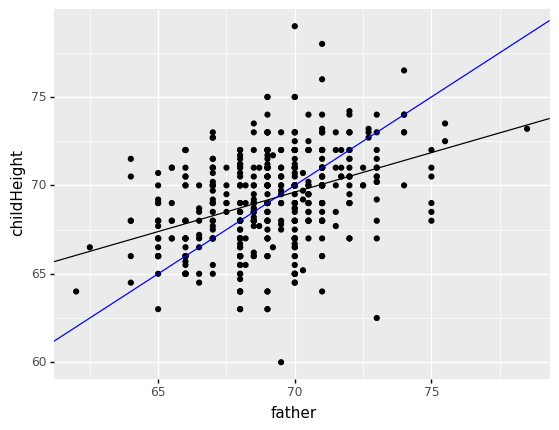

<ggplot: (332120760)>

In [6]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=0, slope=1, color='blue')

* We can easily get the regression plot with seaborn's `lmplot()` function.

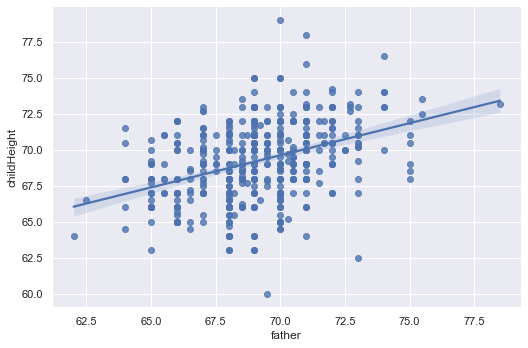

In [7]:
sns.lmplot(x='father', y='childHeight', data=fathers_sons, aspect=1.5)

* It may be useful to make a graph of our model predictions, i.e. the points on the regression line that correspond to the values ​​of the independent variable.

* Predictions are available from our model via the `fittedvalues` property.

* Predictors are generally *not equal to the values ​​of the dependent variable*.

In [8]:
fathers_sons_res.fittedvalues

0      73.414606
4      72.075038
5      72.075038
8      71.851776
10     71.851776
         ...    
918    66.940028
924    66.940028
925    66.940028
929    66.046983
932    66.270244
Length: 481, dtype: float64

* In the diagram we will make we will use red for the model predictions and black for the actual observations.

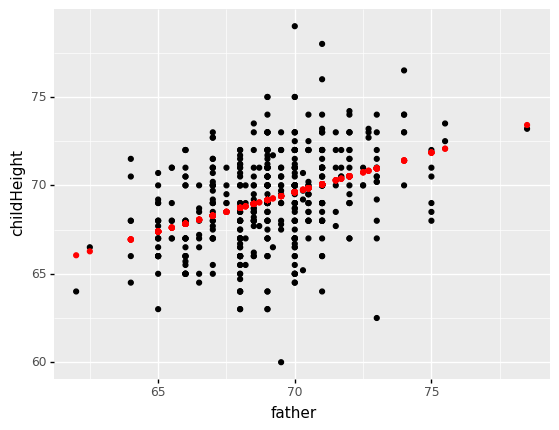

<ggplot: (332272080)>

In [9]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_point(mapping=aes(x='father', y=fathers_sons_res.fittedvalues), color='red')

* A summary of all regression parameters and results is available from the `summary()` method.

In [10]:
fathers_sons_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     87.17
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           3.74e-19
Time:                        16:45:02   Log-Likelihood:                -1105.8
No. Observations:                 481   AIC:                             2216.
Df Residuals:                     479   BIC:                             2224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3626      3.308     11.596      0.000      31.862      44.863
father         0.4465      0.048      9.337      0.000       0.353       0.540
==============================================================================
Omnibus:                        8.610   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               12.731
Skew:                          -0.110   Prob(JB):                      0.00172
Kurtosis:                       3.766   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* In the summary table of results, the *coefficient of determination* (coefficient of determination) R-squared is given in the first line.

* This coefficient can also be obtained with the `rsquared' property.

In [11]:
fathers_sons_res.rsquared

0.1539648084533538

* $R^2$ is a *goodness of fit* metric, i.e. it indicates how well the data fits our model.

* $R^2$ ranges from 0 to 1.

* $R^2 = 0$ means that our predictions are equivalent to always predicting as $y$ the mean of the observations, for any value of $x$ .

* $R^2 = 1$ means that the observations lie on a straight line.

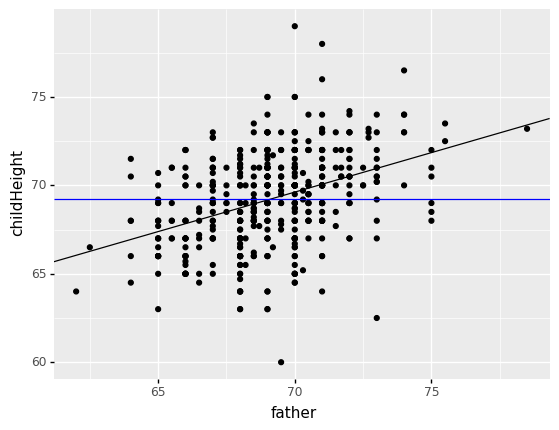

<ggplot: (332115725)>

In [12]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=fathers_sons.childHeight.mean(), slope=0, color='blue')

* In linear regression it is true that $R^2 = r^2$.

In [13]:
print(fathers_sons_res.rsquared, pearsonr[0]**2)
np.isclose(fathers_sons_res.rsquared, pearsonr[0]**2)

0.1539648084533538 0.15396480845335347


True

* The value $R^2 = 0{,}154$ that we observe means that our model explains 15.4% of the variation (variation) of the height of the son based on the height of the father.

* Indeed, the values ​​are quite spread out around the regression line.

* The difference between the value of the dependent variable and the prediction is called the *residual*.

* We can use the residuals of a model to construct a diagram.

* In this diagram we put, for each value of the independent variable, the corresponding balance.

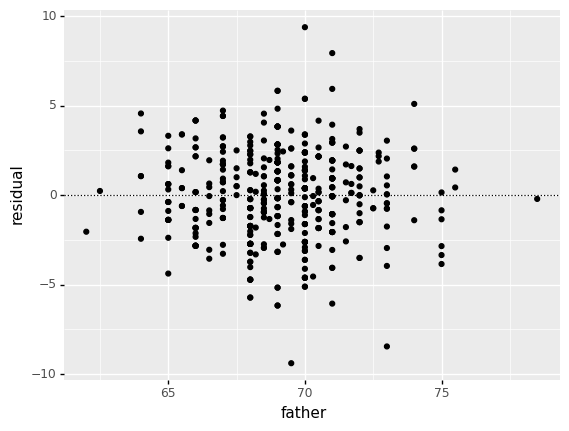

<ggplot: (332354871)>

In [14]:
ggplot(data=fathers_sons) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x=fathers_sons['father'], y=fathers_sons_res.resid)) +\
    ylab('residual')

* The resulting chart should not show any regularity.

* Then the rest are, we say, *homoscedastic*: they do not depend on the independent variable

* Otherwise, they are *heteroscedastic*, heteroscedastic.

* If the plot shows some regularity and the data is heteroscedastic, this is an indication that our assumption that a linear model can explain our data may be incorrect.

* Balance chart is very easily produced with seaborn.

<AxesSubplot:xlabel='father', ylabel='childHeight'>

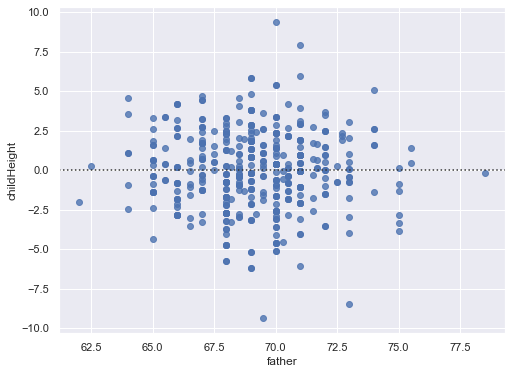

In [15]:
plt.figure(figsize=(8, 6))
sns.residplot(x='father', y='childHeight', data=fathers_sons)

* Another diagnostic chart that we can construct is the QQ chart (quantile-quantile plot).

* This plot allows us to check an additional assumption of the linear regression model, that the residuals follow a normal distribution.

* The QQ plot depicts the quantiles of the residuals and the quantiles of a corresponding normal distribution.

* If the residuals follow a normal distribution, the plot points should fall on the diagonal.

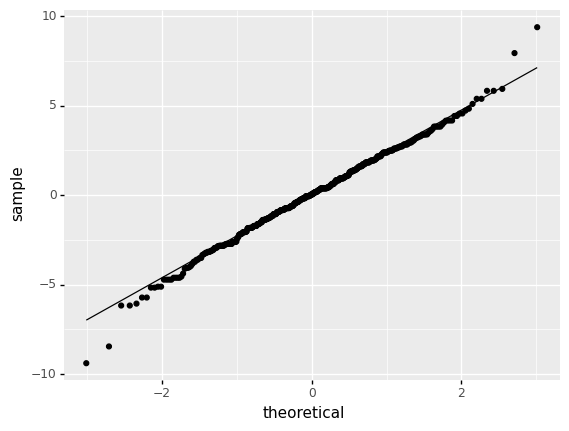

<ggplot: (332408760)>

In [16]:
ggplot(data=fathers_sons_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

* The rest give us the key to understanding how linear regression works.

* Linear regression finds the line that minimizes the sum of the squares of the residuals.

* It does this with the *Ordinary Least Squares* method.

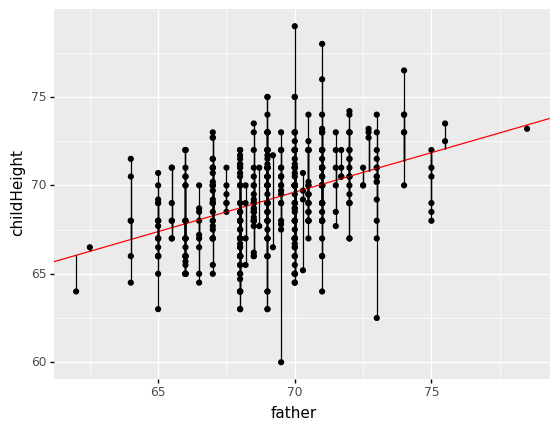

<ggplot: (332462279)>

In [17]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father'], color='red') +\
    geom_linerange(mapping=aes(x='father', 
                               ymin=fathers_sons_res.fittedvalues, 
                               ymax='childHeight'))

* Now let's consider another data set.

* The data includes the values ​​of two variables `c` and `d` for the years from 1999 to 2019.

In [18]:
cd = pd.read_csv('correlation_regression.csv')
print(cd.shape)
cd.iloc[[0, -1]]

(21, 3)


,year,c,d
0,1999,7.588764,330
20,2019,8.587049,1070


* As we can see in the next diagram, the two variables `c` and `d` seem to follow similar paths.

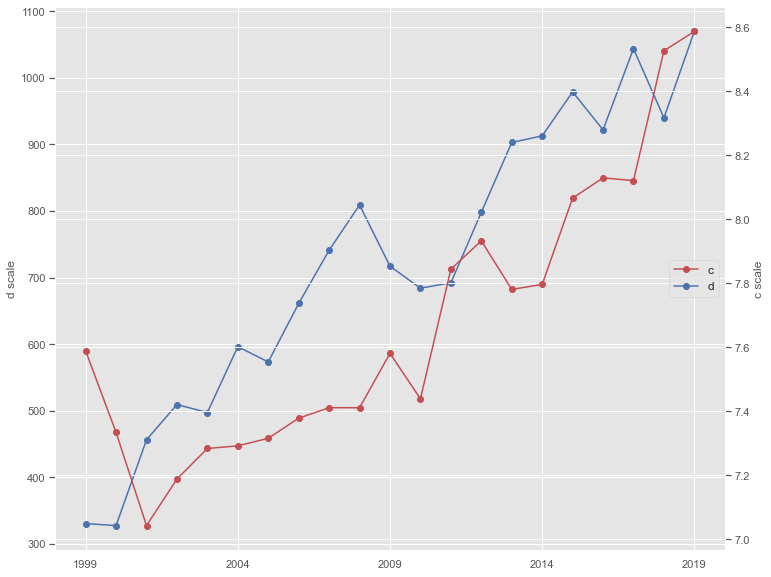

In [19]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(12, 10))
d_line, = ax1.plot(cd.year, cd.d, 'bo-', label='d')
ax1.set_ylabel('d scale')

ax2 = ax1.twinx()
c_line, = ax2.plot(cd.year, cd.c, 'ro-', label='c')
ax2.set_ylabel('c scale')

plt.xticks(np.arange(cd.year.min(), cd.year.max()+1, step=5))
plt.legend(handles=[c_line, d_line], loc='right', fontsize=12)

* The Pearson correlation coefficient indeed confirms this.

In [20]:
stats.pearsonr(cd.c, cd.d)

(0.7980824438518808, 1.457161889155522e-05)

* We can proceed to create a linear regression model.

In [21]:
cd_mod = smf.ols("d ~ c", data=cd)
cd_res = cd_mod.fit()
cd_res.params

Intercept   -2423.778839
c             410.191120
dtype: float64

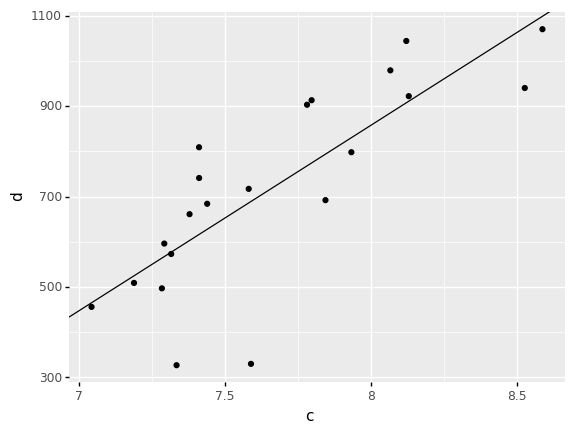

<ggplot: (332575254)>

In [22]:
ggplot(data=cd) +\
    geom_point(mapping=aes(x='c', y='d')) +\
    geom_abline(intercept=cd_res.params['Intercept'], 
                slope=cd_res.params['c'])

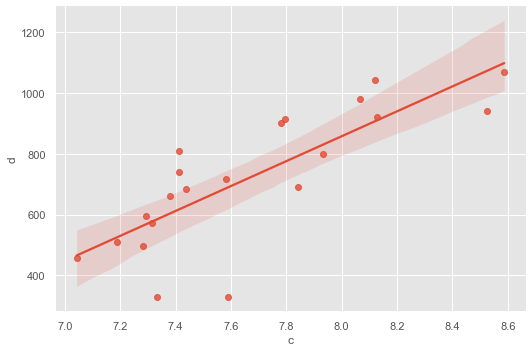

In [23]:
sns.lmplot(x='c', y='d', data=cd, aspect=1.5)

* And let's see the summary.

In [24]:
cd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     33.33
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.46e-05
Time:                        16:45:04   Log-Likelihood:                -132.06
No. Observations:                  21   AIC:                             268.1
Df Residuals:                      19   BIC:                             270.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2423.7788    545.684     -4.442      0.000   -3565.909   -1281.649
c            410.1911     71.048      5.773      0.000     261.485     558.897
==============================================================================
Omnibus:                        7.240   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.796
Skew:                          -1.057   Prob(JB):                       0.0909
Kurtosis:                       4.007   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* So we have seen that the model of the second example fits the data quite well, since it explains more than 60% of its variation:

In [25]:
cd_res.rsquared

0.6369355871845903

* But what really was our data?

* What were the variables `c` and `d`?

* The `c' variable is actually US per capita cheese consumption in the years 1999-2019.

* The variable `d` is the number of deaths in the US from suffocation and strangulation accidents in bed.

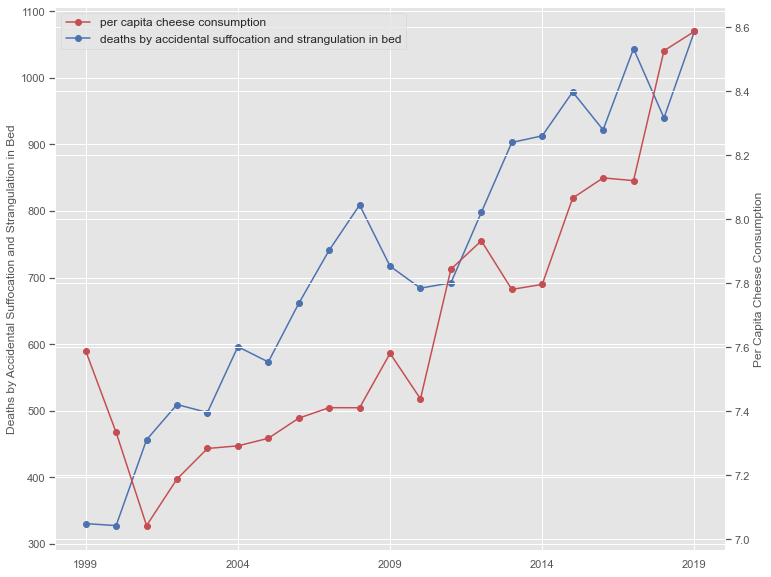

In [26]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(12, 10))
d_line, = ax1.plot(cd.year, cd.d, 'bo-', label='deaths by accidental suffocation and strangulation in bed')
ax1.set_ylabel('Deaths by Accidental Suffocation and Strangulation in Bed')

ax2 = ax1.twinx()
c_line, = ax2.plot(cd.year, cd.c, 'ro-', label='per capita cheese consumption')
ax2.set_ylabel('Per Capita Cheese Consumption')

plt.xticks(np.arange(cd.year.min(), cd.year.max()+1, step=5))
plt.legend(handles=[c_line, d_line], loc='upper left', fontsize=12)

* Should we really think there is a connection between the two?

### Attention: correlation does not imply causation!
### Just because we observe a statistical relationship in our data does not mean that our data are not unrelated.


* The above example example can be found on Tyler Vigen's website (and book) [Spurious Correlations](https://www.tylervigen.com/spurious-correlations).